In [1]:
import skvideo.io
import skvideo.utils
from skvideo.measure import strred, ssim, msssim, psnr, niqe
import seaborn as sns
import numpy as np
import matplotlib as plt
import pandas as pd

In [2]:
TEST_VIDEO = ('test-h265')

In [3]:
def make_data_set_FR(reference, test_base, crf, model):
    reference_luma = skvideo.io.vread(reference)[:,:,:,0]
    data_set = {}
    
    for crf_value in crf:
        test_luma = skvideo.io.vread('%s%s.mov' % (test_base, crf_value))[:,:,:,0]
        data_set['CRF%s' % crf_value] = model(reference_luma, test_luma)
        
    return pd.DataFrame(data_set)

In [4]:
def make_data_set_RR(reference, test_base, crf, model):
    reference_luma = skvideo.io.vread(reference)[:,:,:,0]
    data_set = {}
    
    for crf_value in crf:
        test_luma = skvideo.io.vread('%s%s.mov' % (test_base, crf_value))[:,:,:,0]
        data_set['CRF%s' % crf_value] = model(reference_luma, test_luma)
        
    return pd.DataFrame(data_set)

In [5]:
def make_data_set_NR(test_base, crf, model):
    data_set = {}
    
    for crf_value in crf:
        test_luma = skvideo.io.vread('%s%s.mov' % (test_base, crf_value))[:,:,:,0]
        data_set['CRF%s' % crf_value] = model(test_luma)
        
    return pd.DataFrame(data_set)

In [6]:
def plot_data(data_set, model="PSNR", columns=[]):
    sns.set()
    sns.set(rc = {'figure.figsize':(21,9)})
    sns.set_theme(style="whitegrid")
    
    if columns == []:
        current_data_set = data_set
    else:
        current_data_set = data_set[columns]
    
    figure = sns.lineplot(data=current_data_set, marker='o')
    figure.set_xlabel("Frame Number", fontsize = 18)
    figure.set_ylabel(model, fontsize = 18)
    
    return figure

Generate the data sets for the different video quality models

In [7]:
psnr_data_set = make_data_set_FR('reference.mov', 'test-h265-crf-', crf=(20, 30, 40), model=psnr)

In [8]:
ssim_data_set = make_data_set_FR('reference.mov', 'test-h265-crf-', crf=(20, 30, 40), model=ssim)

STRRED output is inconsistent with the other models

In [9]:
strred_data_set = make_data_set_RR('reference.mov', 'test-h265-crf-', crf=(20, 30, 40), model=strred)

In [10]:
with np.printoptions(threshold=np.inf):
    print(strred_data_set)

                                               CRF20  \
0  [[1.2621169, 7.237036, 0.10821712, 0.4860307],...   
1                                          13.073391   
2                                           0.129598   

                                               CRF30  \
0  [[3.5107706, 9.3258915, 0.27178913, 0.43925312...   
1                                          37.691189   
2                                           0.676432   

                                               CRF40  
0  [[7.3550963, 16.734972, 0.38240483, 1.2899214]...  
1                                         127.001022  
2                                           2.447229  


In [11]:
niqe_data_set = make_data_set_NR('test-h265-crf-', crf=(20, 30, 40), model=niqe)

Plot the data (default is to plot all the data)  
Use the columns to limit the data (CRF20, CRF30, CRF40)

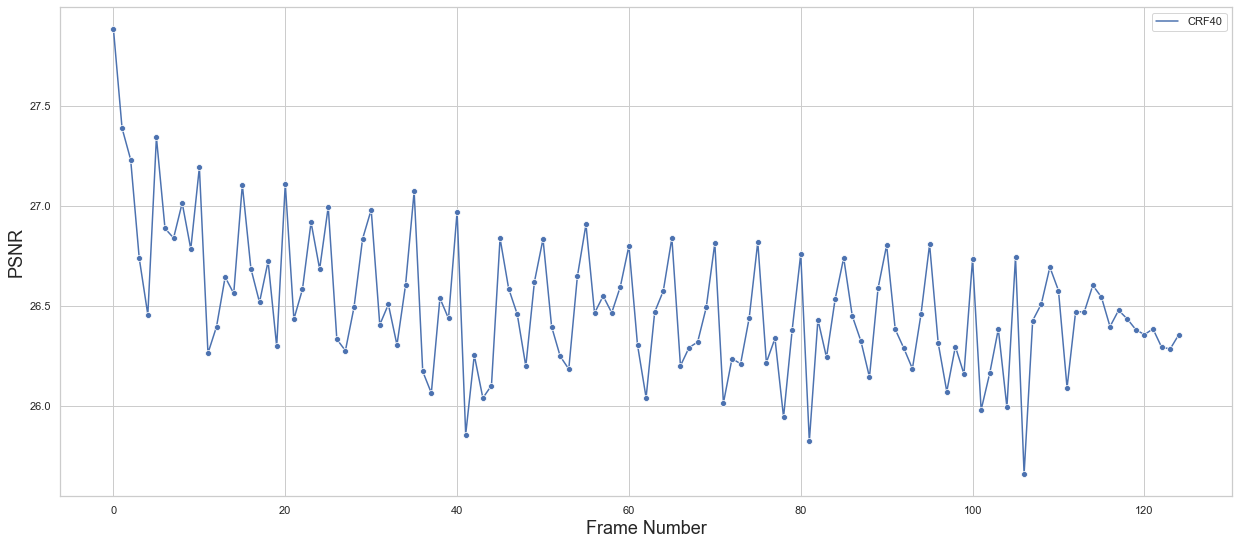

In [12]:
psnr_figure = plot_data(psnr_data_set, "PSNR", columns=['CRF40'])

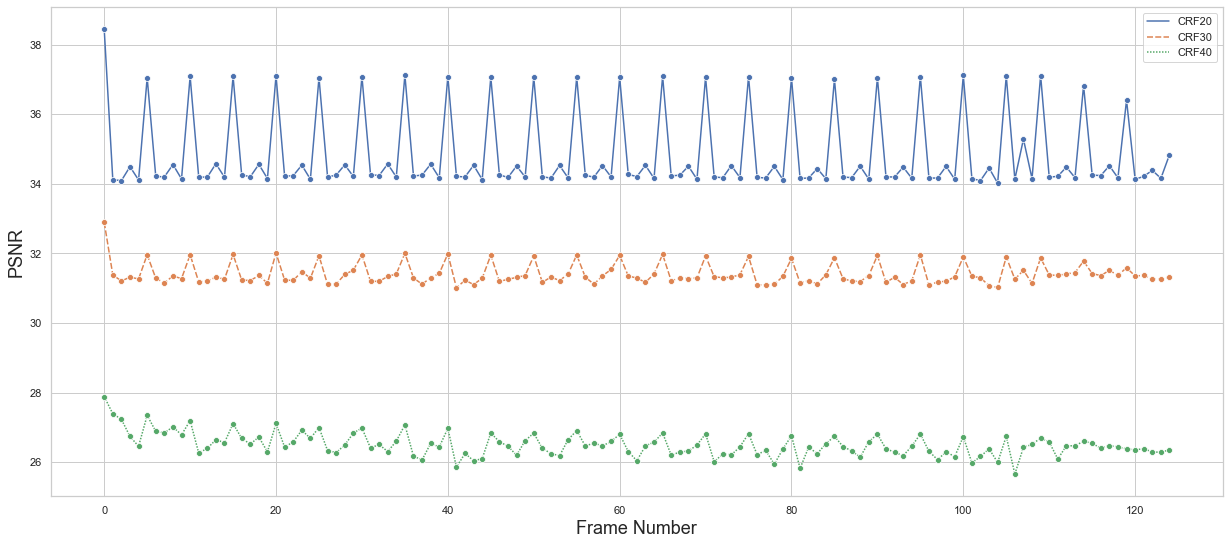

In [13]:
psnr_figure = plot_data(psnr_data_set, "PSNR")

Save the figure to a PNG image

In [14]:
psnr_figure.get_figure().savefig('%s-%s.png' % (TEST_VIDEO, 'psnr'), dpi=300)

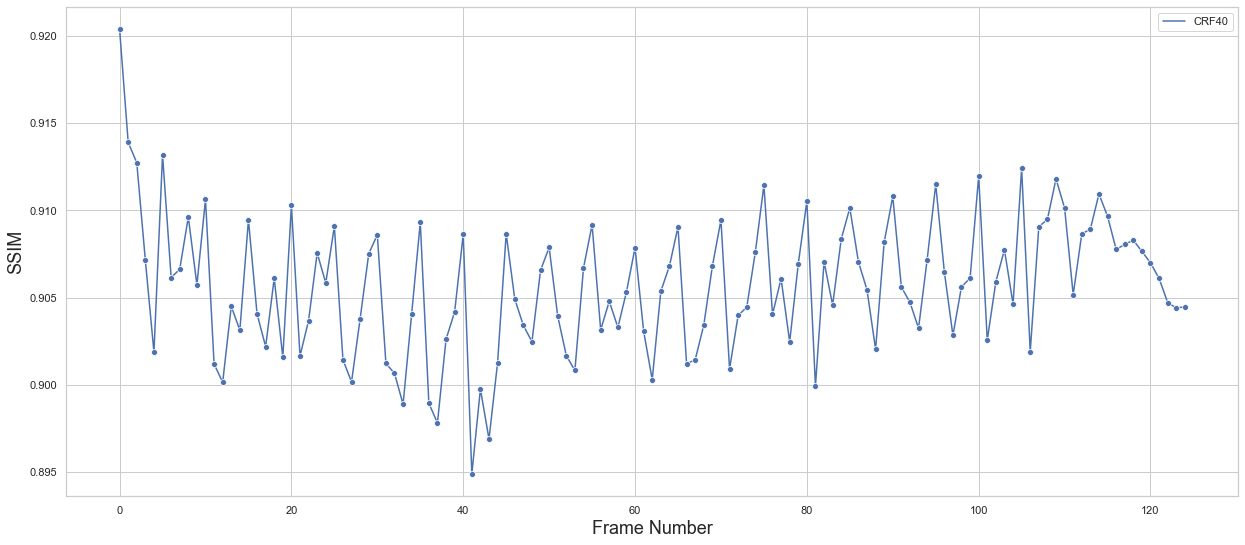

In [15]:
ssim_figure = plot_data(ssim_data_set,"SSIM", columns=['CRF40'])

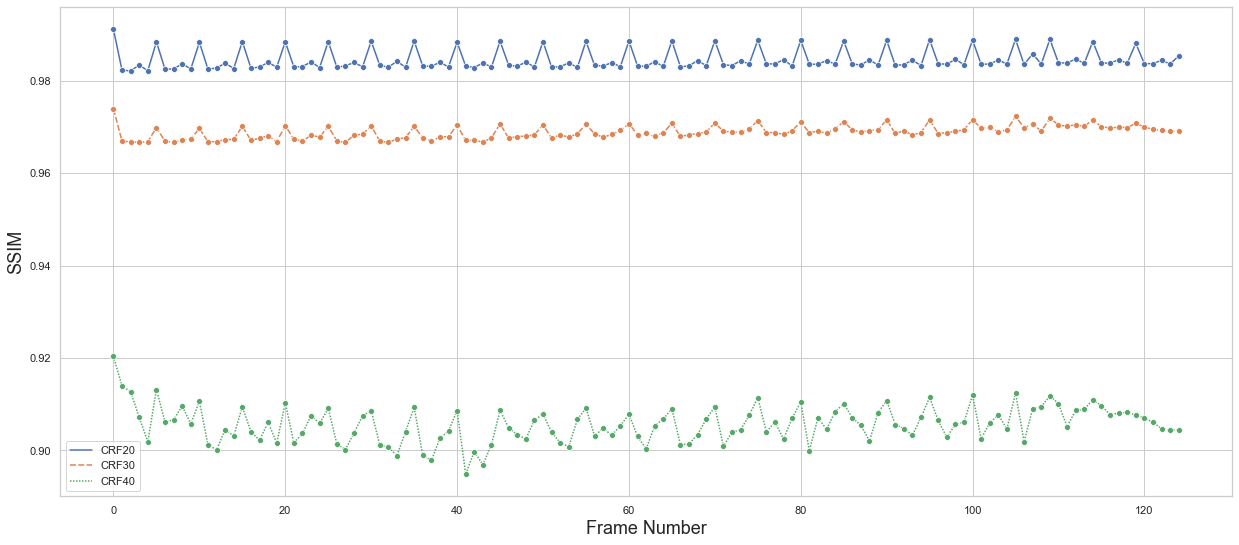

In [16]:
ssim_figure = plot_data(ssim_data_set,"SSIM")

In [17]:
ssim_figure.get_figure().savefig('%s-%s.png' % (TEST_VIDEO, 'ssim'), dpi=300)

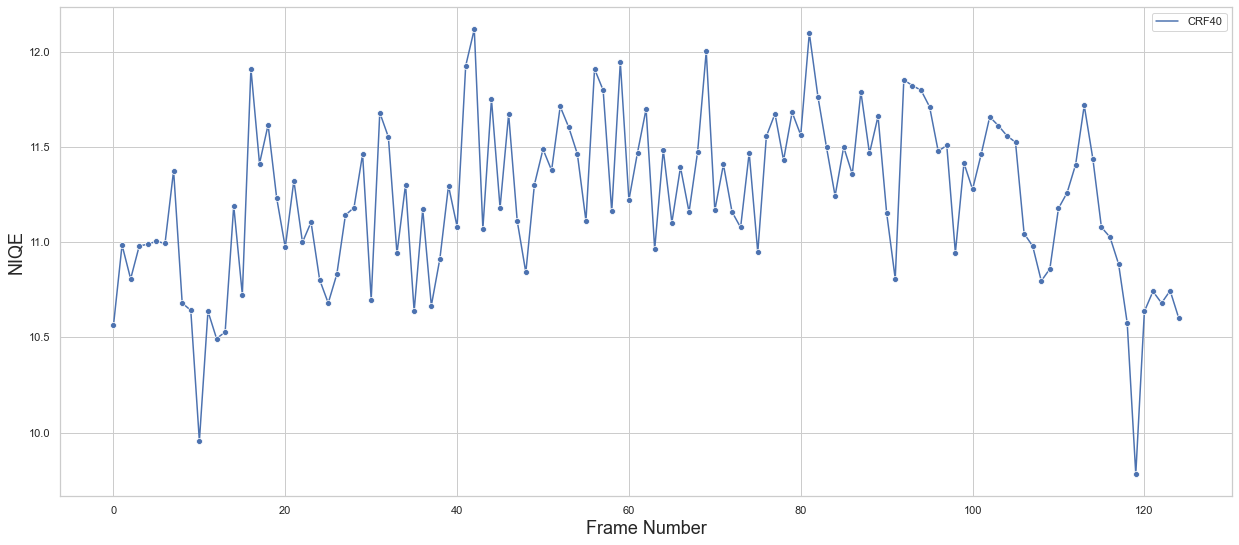

In [18]:
niqe_figure = plot_data(niqe_data_set, "NIQE", columns=['CRF40'])

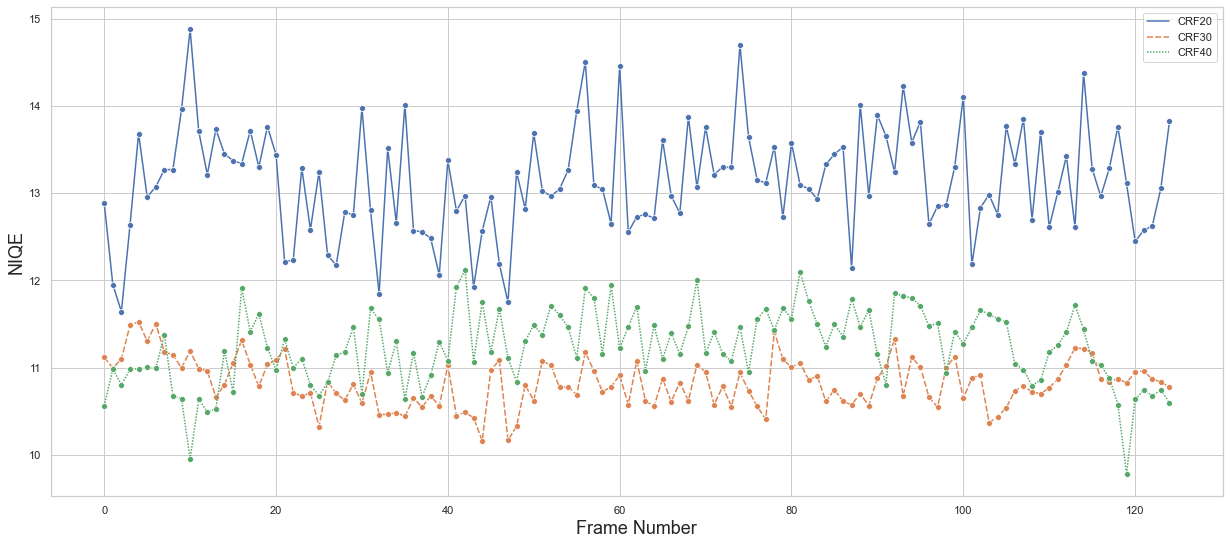

In [19]:
niqe_figure = plot_data(niqe_data_set, "NIQE")

In [20]:
niqe_figure.get_figure().savefig('%s-%s.png' % (TEST_VIDEO, 'niqe'), dpi=300)